In [1]:
# %% libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [6]:
# %% aesthetics
plt.style.use('seaborn-bright')
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=10)

In [9]:
# %% fake data
np.random.seed(111) # fix the seed to ensure reproducibility
n = 30
x = np.random.randn(n)
y = 10 + x * (1+ np.random.randn(n))

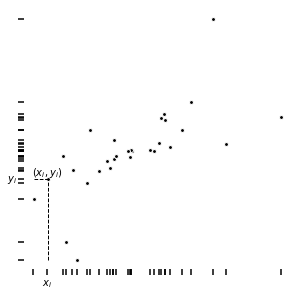

In [7]:
# %% plot

# create figure
fig = plt.figure(figsize=(5, 5))

# parition the figure into 4 subplots with 'gridspec'
gs = gridspec.GridSpec(2, 2, # we want 2 rows, 2 cols
                       figure=fig, # this gs applies to figure
                       hspace=-0.05, wspace=-0.05, # separation between plots
                       width_ratios=[0.5, 10], # ratio between the first
                       # and second column
                       height_ratios=[10, 0.5]) # ratio between the first and second row

# add plots
ax0 = fig.add_subplot(gs[0, 0]) # this will occupy the first row-first colum
ax1 = fig.add_subplot(gs[0, 1]) # and so on and so forth...
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# empty plot
ax2.axis('off')

# univariate distribution of y
ax0.scatter(np.ones(len(y)), y, marker='_', color='black', alpha=1) # draw plot
ax0.axis('off') # set axes off

# x-y scatter diagram
ax1.scatter(x, y, marker='o', s=15, color='black', alpha=1, edgecolor='white')
ax1.axis('off') # remove axes

# univariate distribution of x
ax3.scatter(x, np.ones(len(x)), marker='|', color='black', alpha=1)
ax3.axis('off')

# pick-up one data point to emphasize, add reference lines and textbox
np.random.seed(333) # fix the seed to ensure reproducibility
i = np.random.randint(0, len(x), 1)
x_i, y_i = x[i], y[i]
# vertical reference line
ax1.plot([x_i, x_i], [np.min(y), y_i], color='black',
         ls='--',
         lw='1')
# horizontal reference line
ax1.plot([np.min(x), x_i], [y_i, y_i], color='black',
         ls='--',
         lw='1')
# textbox within the scatter
textstr = (r'$(x_{i}, y_{i})$')
x_range = np.max(x) - np.min(x)
y_range = np.max(y) - np.min(y)
ax1.text(x_i, y_i, textstr,
         horizontalalignment='center', verticalalignment='bottom')
# textbox within the x distro
textstr = (r'$x_{i}$')
ax3.text(x_i, 1 - 0.5, textstr, horizontalalignment='center')
# textbox within the y distro
textstr = (r'$y_{i}$')
ax0.text(1 - 0.5, y_i, textstr, verticalalignment='center')

# save plot
out_f = os.path.join(os.getcwd(), 'tufte_scatter.pdf')
#fig.savefig(out_f)

# show plot
#plt.show()